# Note!

The mixed likelihood doesn't expose the hyperparameters of the likelihoods inside it - so these are fixed.

In [1]:
import GPy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mix_integral_coreg import Mix_Integral_Coreg
from mixed import Mixed
from scipy.stats import norm

In [4]:
X

array([[ 2.,  0.,  0.],
       [ 4.,  2.,  0.],
       [ 6.,  4.,  0.],
       [ 8.,  6.,  0.],
       [20., 18.,  0.],
       [22., 20.,  0.],
       [24., 22.,  0.],
       [26., 24.,  0.]])

In [27]:
X = 2.0*np.array([[1,0],[2,1],[3,2],[4,3],[10,9],[11,10],[12,11],[13,12]])
X = np.c_[X,np.zeros([len(X),1])]
Y = 10.0*np.array([[7,6,4,1,1,4,6,7]]).T
Y+=np.random.randn(len(Y),1)*0.1

coregX = np.arange(0,20)[:,None]
coregY = coregX**2
coregX = np.c_[coregX,np.ones([len(coregX),1]),np.ones([len(coregX),1])]
X = np.r_[X,coregX]
Y = np.r_[Y,coregY]
#    fn_idx = np.zeros([len(X),1])
#    non_negs_X = np.linspace(0,26,n_non_negs)[:,None]
#    non_negs_X = np.c_[non_negs_X,np.zeros([len(non_negs_X),1]),np.ones([len(non_negs_X),1])]
#    non_negs_Y = np.ones([len(non_negs_X),1])
#    non_negs_fn_idx = np.ones_like(non_negs_Y)
#    X = np.r_[X,non_negs_X]
#    Y = np.r_[Y,non_negs_Y]
#    fn_idx = (np.r_[fn_idx,non_negs_fn_idx]).astype(int)
#    scaling = np.ones_like(fn_idx)/10
#    Y_metadata = {'likelihood_fn_index':fn_idx}#,'scaling':scaling}
kernel = Mix_Integral_Coreg(3,variances=250.0,lengthscale=[5.0],coreg=1)
m = GPy.models.GPRegression(X,Y,kernel)


testX = np.linspace(-5,30,500)[:,None]
testX = np.c_[testX,np.zeros([len(testX),1]),np.ones([len(testX),1])]

mu,var = m.predict_noiseless(testX)

LinAlgError: not positive definite, even with jitter.

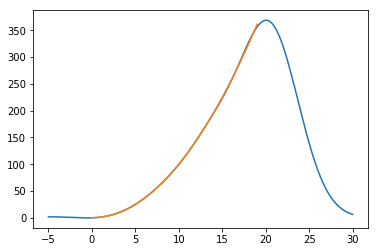

In [24]:
plt.plot(testX[:,0],mu)
plt.plot(coregX[:,0],coregY[:,0])
